In [496]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot



#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier 
import graphviz
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [497]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [498]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

# Confusion Matrix

In [499]:
#imports
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  

In [500]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled, columns=df.columns)

In [501]:
#Splitting dataset to x and y
y = df.Legendary
X = df.drop(columns = "Legendary")  

In [502]:
#functions for entropy 

def decisionTreeEntropy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
  tree_clf.fit(X_train, y_train)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      tree_clf.fit(X_train, y_train)  
      y_pred = tree_clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=target_names))  
#Printing confusion tree
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True)
    
 #roc curve
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

In [503]:
def decisionTreeGini(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  tree_clf = DecisionTreeClassifier(max_depth=2, criterion = "gini", random_state=42)
  tree_clf.fit(X_train, y_train)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      tree_clf.fit(X_train, y_train)  
      y_pred = tree_clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=target_names))
 
#Printing confusion tree
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True)
    
#roc curve  
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

In [504]:
def KnnClassifier(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  knn = KNeighborsClassifier(n_neighbors = 10)
  knn.fit(X_train, y_train) 
  print("score",knn.score(X_test, y_test))
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      knn.fit(X_train, y_train) 
      y_pred = knn.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=target_names))
    
  #Printing confusion tree
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True)
    
  #roc curve  
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

In [505]:
def NaiveClassifier (X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  nbclf = GaussianNB().fit(X_train, y_train)
  print("score",nbclf.score(X_test, y_test))
  y_pred = nbclf.predict(X_test) 
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      nbclf = GaussianNB().fit(X_train, y_train)
      y_pred = nbclf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=target_names))
    
  #Printing confusion tree
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True)
    
  #roc curve  
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       214
           1       0.63      1.00      0.77        12

    accuracy                           0.97       226
   macro avg       0.82      0.98      0.88       226
weighted avg       0.98      0.97      0.97       226



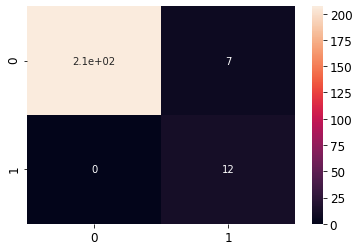

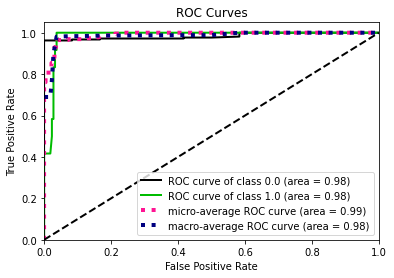

In [506]:
decisionTreeEntropy(X,y) 


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       205
           1       0.75      1.00      0.86        21

    accuracy                           0.97       226
   macro avg       0.88      0.98      0.92       226
weighted avg       0.98      0.97      0.97       226



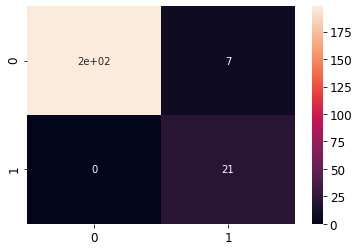

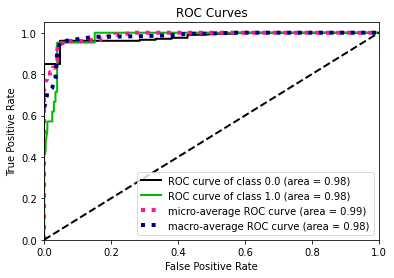

In [507]:
decisionTreeGini(X,y)

score 0.9424778761061947
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       206
           1       0.89      0.40      0.55        20

    accuracy                           0.94       226
   macro avg       0.92      0.70      0.76       226
weighted avg       0.94      0.94      0.93       226



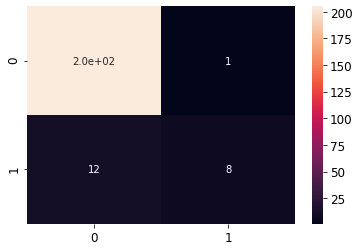

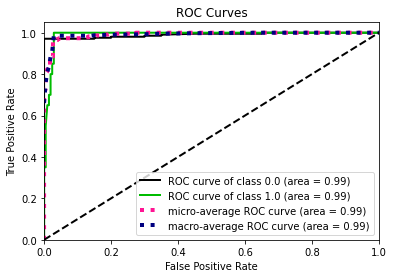

In [508]:
KnnClassifier(X,y)

score 0.9823008849557522
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       207
           1       0.83      1.00      0.90        19

    accuracy                           0.98       226
   macro avg       0.91      0.99      0.95       226
weighted avg       0.99      0.98      0.98       226



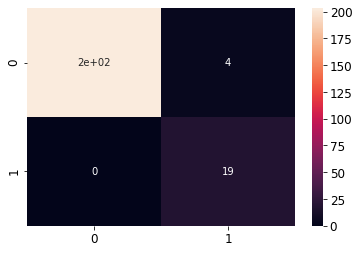

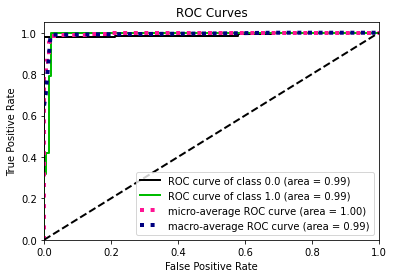

In [509]:
NaiveClassifier(X,y)

# Proposed Model (Neural Network Keras Classifier)

In [482]:
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.utils import to_categorical 

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [484]:
# compile the model
model = Sequential()

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m]) 

In [485]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=0)

In [486]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [487]:
model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0919 - acc: 0.9583 - f1_m: 0.4429 - precision_m: 0.5500 - recall_m: 0.3875
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0893 - acc: 0.9600 - f1_m: 0.5161 - precision_m: 0.6500 - recall_m: 0.4542
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0880 - acc: 0.9567 - f1_m: 0.5150 - precision_m: 0.7000 - recall_m: 0.4292       
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0866 - acc: 0.9550 - f1_m: 0.4848 - precision_m: 0.6000 - recall_m: 0.4308
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0859 - acc: 0.9583 - f1_m: 0.5108 - precision_m: 0.6250 - recall_m: 0.4717
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0844 - acc: 0.9583 - f1_m: 0.4983 - precision_m: 0.6500 - recall_m: 0.4583
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0832 - acc: 0.9567

20/20 [==============================] - 0s 2ms/step - loss: 0.0606 - acc: 0.9633 - f1_m: 0.6270 - precision_m: 0.6769 - recall_m: 0.6625
Epoch 55/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0605 - acc: 0.9617 - f1_m: 0.6668 - precision_m: 0.6792 - recall_m: 0.7032
Epoch 56/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0591 - acc: 0.9617 - f1_m: 0.5513 - precision_m: 0.6067 - recall_m: 0.5542        
Epoch 57/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0606 - acc: 0.9633 - f1_m: 0.5724 - precision_m: 0.6262 - recall_m: 0.5845
Epoch 58/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0591 - acc: 0.9667 - f1_m: 0.6971 - precision_m: 0.6583 - recall_m: 0.7583        
Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0592 - acc: 0.9650 - f1_m: 0.6456 - precision_m: 0.7050 - recall_m: 0.6325        
Epoch 60/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0586 - 

In [488]:
model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_239 (Dense)            (None, 12)                96        
_________________________________________________________________
dense_240 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [490]:
y_pred = model.predict_classes(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       137
         1.0       0.86      0.86      0.86        14

    accuracy                           0.97       151
   macro avg       0.92      0.92      0.92       151
weighted avg       0.97      0.97      0.97       151



<AxesSubplot:>

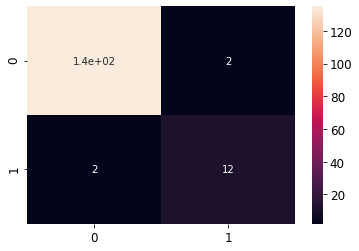

In [495]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

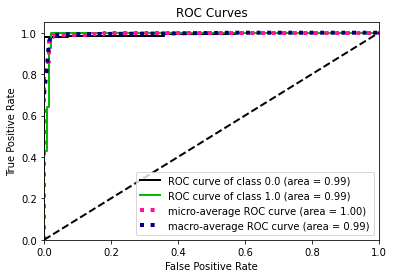

In [511]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


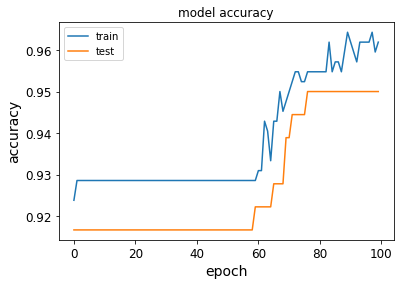

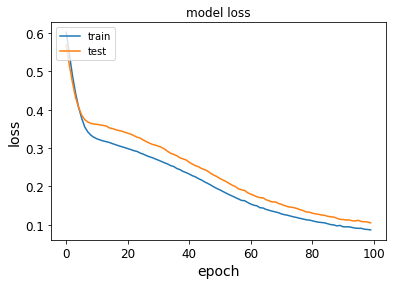

In [513]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()